1-Read datas

2-Povert rate of each state

3-Most common 15 name or surname of killed people

4-High school graduation rate of the population that is older than 25 in states

5-Percentage of state's population according to races that are black,white,native american,asian and hispanic

6-High school graduation rate vs Poverty rate of each state

7-Kill properties
   - manner of death
   - kill weapon
   - age of killed people
   - race of killed people
   - most dangeroues cities
   - most dangerous states
   - having mental ilness or not for killed people
   - threat types
   - flee types
   - having body cameras or not for police

8- Race rates according to states in kill data

9- Kill numbers from states in kill data

plot contents:
- bar plot
- point plot
- joint plot
- count plot
- pie chart
- lm plot
- kde plot
- box plot
- swarm plot
- pair plot

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

## 1-Read datas

In [2]:
meidan_house_hold_in_come=pd.read_csv("MedianHouseholdIncome2015.csv",encoding="windows-1252")
percentage_people_below_povert_level=pd.read_csv("PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
percent_over_25_completed_highschool=pd.read_csv("PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
share_race_by_city=pd.read_csv("ShareRaceByCity.csv",encoding="windows-1252")
police_killings_us=pd.read_csv("PoliceKillingsUS.csv",encoding="windows-1252")

## 2- Poverty rate of each state ( eyaletlerdeki fakirlik oranı)

### Veriyi inceleyim 

In [3]:
percentage_people_below_povert_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_povert_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [5]:
percentage_people_below_povert_level.poverty_rate.value_counts()
# sonucunda "-" nin karşılığında 201 kişi var fakat - ne anlama geliyor ?
# - ye sahip veriyi 0 a dönüştürelim

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

* Veriyi inceledik ve hatalı değer bulduk - yerini 0 la dolduralım

In [6]:
percentage_people_below_povert_level.poverty_rate.replace(["-"],0.0,inplace=True) 
#"-" yi bul ve 0 ile değiştir

percentage_people_below_povert_level.poverty_rate=percentage_people_below_povert_level.poverty_rate.astype(float)
# info()' ya bakılınca poverty_rate in object türünde olduğunu görüyoruz. bu veriyi floata çevirdik

area_list=list(percentage_people_below_povert_level["Geographic Area"].unique())
#unik değerleri listeledik

In [7]:
# grafiği poverty_rate oranının yüksekliğine göre çizmek isteidğimiz için 
# poverty rate e göre bir büyükten küçüğe sıralama yapalım
area_poverty_ratio = []
for i in area_list:
    x=percentage_people_below_povert_level[percentage_people_below_povert_level['Geographic Area']==i]
    #datanın içinde kaydettiğimiz unik eyaletlerin herbirini tek tek bulduruyoruz
    
    area_poverty_rate=sum(x.poverty_rate)/len(x)
    #poverty_rate in ortalamasını al
    
    area_poverty_ratio.append(area_poverty_rate)
    #bulduğumuz ortalamayı boş listemizin içine ekle
    
df=pd.DataFrame({'area_list':area_list,"area_poverty_ratio":area_poverty_ratio})
#dataframein columnları area_list ve area_povert_ratio oldu 

new_index=(df["area_poverty_ratio"].sort_values(ascending=False)).index.values #ascengding = false azalan sırada olsun anlamında olur
#indexleri çekiyoruz

sorted_data=df.reindex(new_index) # çektiğimiz yeni indexleri atıyoruz 

Text(0.5, 1.0, 'poverty rate given states')

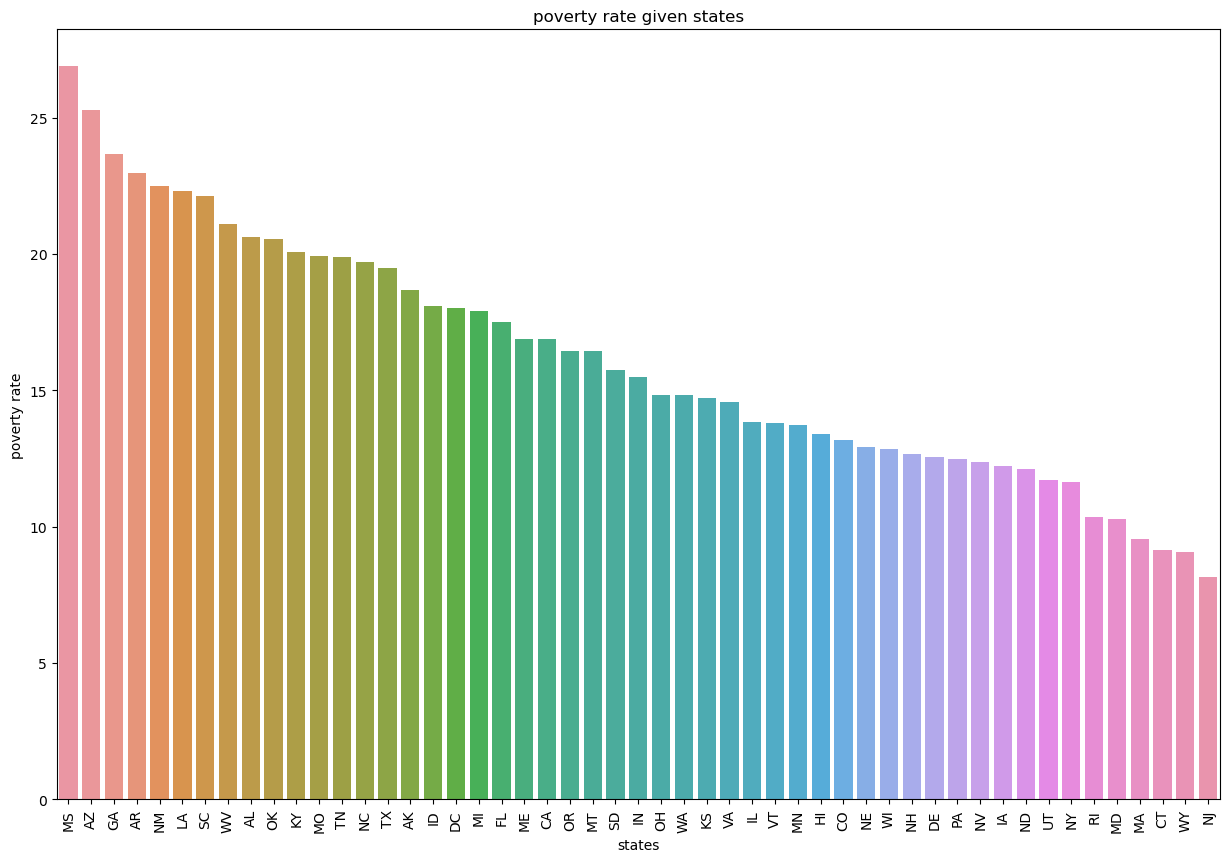

In [8]:
#visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data["area_list"],y=sorted_data["area_poverty_ratio"]) #barplota x(area_list)ve y(area_poverty_ratio) eksenlerini atadık
plt.xticks(rotation=90) # x eksenindeki yazıları 90 dereceyle koy dedik 
plt.xlabel("states")
plt.ylabel("poverty rate")
plt.title("poverty rate given states")

## 3- Most common 15 name or surname of killed people (öldürülen insanların isimleri ve soyisimleri arasında en çok kullanılan 15 tanesini bul)

In [9]:
police_killings_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
police_killings_us.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

#### TK TK gerçek bir isim olamaz analizime bu ismi dahil etmek istemiyorum

In [11]:
separate=police_killings_us.name[police_killings_us.name != "TK TK"].str.split()
#ismi tk tk olmayanları aldık ve isim ve soyisim aytı olmak üzere böldük ("ahmet tarık"-> "ahmet","tarık")

In [12]:
a,b=zip(*separate)
# unzipledik isim soyisim olarak ayırdık

In [13]:
name_list=a+b
# ayırdığımız isim ve soyisimleri tek bir listede birleştiriyoruz
name_list

('Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'William',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'Jam

In [14]:
name_count=Counter(name_list)
#kaç tane isim olduğunu sayıyor
name_count

Counter({'Michael': 91,
         'David': 57,
         'James': 56,
         'Robert': 48,
         'Joseph': 48,
         'William': 47,
         'Daniel': 46,
         'John': 42,
         'Christopher': 40,
         'Lee': 37,
         'Richard': 36,
         'J.': 32,
         'Anthony': 31,
         'Jose': 28,
         'Joshua': 28,
         'Charles': 27,
         'Thomas': 26,
         'Jason': 25,
         'Matthew': 24,
         'Scott': 23,
         'Mark': 22,
         'Smith': 22,
         'Allen': 21,
         'Andrew': 20,
         'Brandon': 20,
         'Johnson': 20,
         'Kenneth': 19,
         'Paul': 19,
         'Edward': 19,
         'Jeffrey': 18,
         'A.': 18,
         'M.': 18,
         'Eric': 17,
         'Ryan': 16,
         'Kevin': 16,
         'Ray': 15,
         'D.': 15,
         'L.': 15,
         'Jeremy': 14,
         'Antonio': 14,
         'Angel': 14,
         'Steven': 14,
         'Keith': 14,
         'Patrick': 13,
         'Nicholas

In [15]:
most_common_names=name_count.most_common(15)
# 15 tane en çok olanı buldurtuyoruz
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

In [16]:
x,y=zip(*most_common_names)
#isimleri ve yaşları unzipledik(iki ayrı tuple haline getirdik)
x,y

(('Michael',
  'David',
  'James',
  'Robert',
  'Joseph',
  'William',
  'Daniel',
  'John',
  'Christopher',
  'Lee',
  'Richard',
  'J.',
  'Anthony',
  'Jose',
  'Joshua'),
 (91, 57, 56, 48, 48, 47, 46, 42, 40, 37, 36, 32, 31, 28, 28))

In [17]:
x,y=list(x),list(y)
#ayrı ayrı listeledik

In [18]:
x

['Michael',
 'David',
 'James',
 'Robert',
 'Joseph',
 'William',
 'Daniel',
 'John',
 'Christopher',
 'Lee',
 'Richard',
 'J.',
 'Anthony',
 'Jose',
 'Joshua']

In [19]:
y

[91, 57, 56, 48, 48, 47, 46, 42, 40, 37, 36, 32, 31, 28, 28]

Text(0.5, 1.0, 'most common 15 name or surname of killed people')

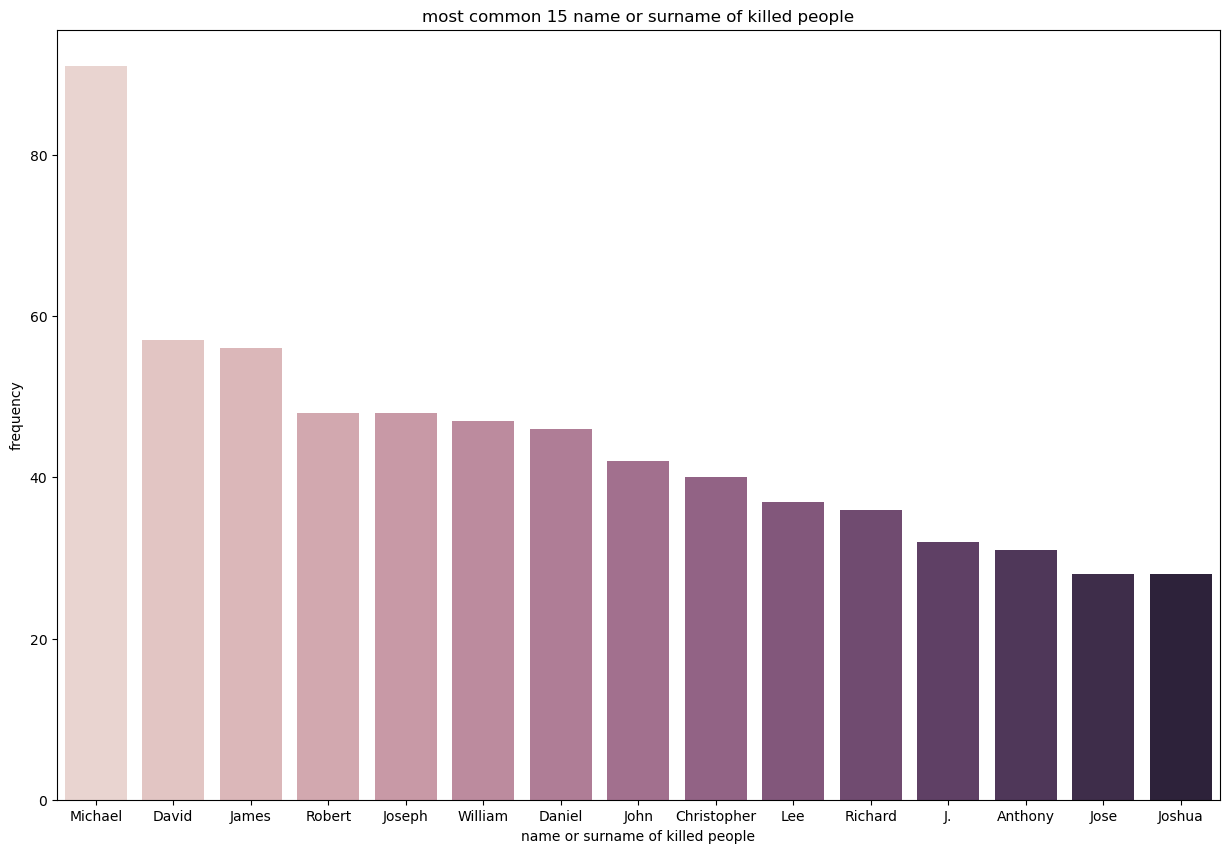

In [20]:
#visualization
plt.figure(figsize=(15,10))

sns.barplot(x=x,y=y,palette=sns.cubehelix_palette(len(x))) 
#palette tablodaki renkleri ifaede ediyor, uzunluk sayısı kadar birbiriyle uyumlu farklı renk verir

plt.xlabel("name or surname of killed people")
plt.ylabel("frequency")
plt.title("most common 15 name or surname of killed people")

## 4- High school graduation rate of population that is older than 25 in states (eyaletlerdeki 25 yaş üstü popülasyonun liseden mezun olma oranı)

In [21]:
percent_over_25_completed_highschool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [22]:
percent_over_25_completed_highschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [23]:
percent_over_25_completed_highschool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

#### Veriyi inceledik ve hatalı değer bulduk - yerini 0 la dolduralım

In [24]:
percent_over_25_completed_highschool.percent_completed_hs.replace(["-"],0.0,inplace=True) 
#"-" yi bul ve 0 ile değiştir

percent_over_25_completed_highschool.percent_completed_hs=percent_over_25_completed_highschool.percent_completed_hs.astype(float)
# info()' ya bakılınca percent_completed_hs in object türünde olduğunu görüyoruz. bu veriyi floata çevirdik

area_list=list(percent_over_25_completed_highschool["Geographic Area"].unique())
#unik değerleri listeledik(benzersiz,tekrarlanmayan değerler)

In [25]:
#listemin içinde dolaş unik olan eyaletleri bul ve filtrele sonra highschoolu tamamlayanları al ve oranını bul
area_highschool=[]
for i in area_list:
    x=percent_over_25_completed_highschool[percent_over_25_completed_highschool['Geographic Area']==i]
    #datanın içinde kaydettiğimiz unik eyaletlerin herbirini tek tek bulduruyoruz
    
    area_highschool_rate=sum(x.percent_completed_hs)/len(x)
    #percent_completed_hs in ortalamasını al
    
    area_highschool.append(area_highschool_rate)
    #bulduğumuz ortalamayı boş listemizin içine ekle

In [26]:
#grafikte güzel görebilmemiz için area_highschool listesini küçükten büyüğe sıralamamız lazım

df=pd.DataFrame({"area_list":area_list,"area_highschool_ratio":area_highschool})
#bu iki sütunu içeren bir df oluşturduk. area_list eyalet isimlerini,area_highschool_ratio mezuniyet oranını tutar

new_index=(df["area_highschool_ratio"].sort_values(ascending=True)).index.values
#df'imi artana göre area_highschool_ratio için sırala ve sıralanmış sütunun index değerlerini değişkene at

sorted_df2=df.reindex(new_index)
#sıralama işlemi sonrasında elde edilen index sırasına göre dataframein sıralanmış halini oluşturur
#sorted_df2 adlı yeni df, area_highschool_ratio sütununu küçükten büyüğe sıralar

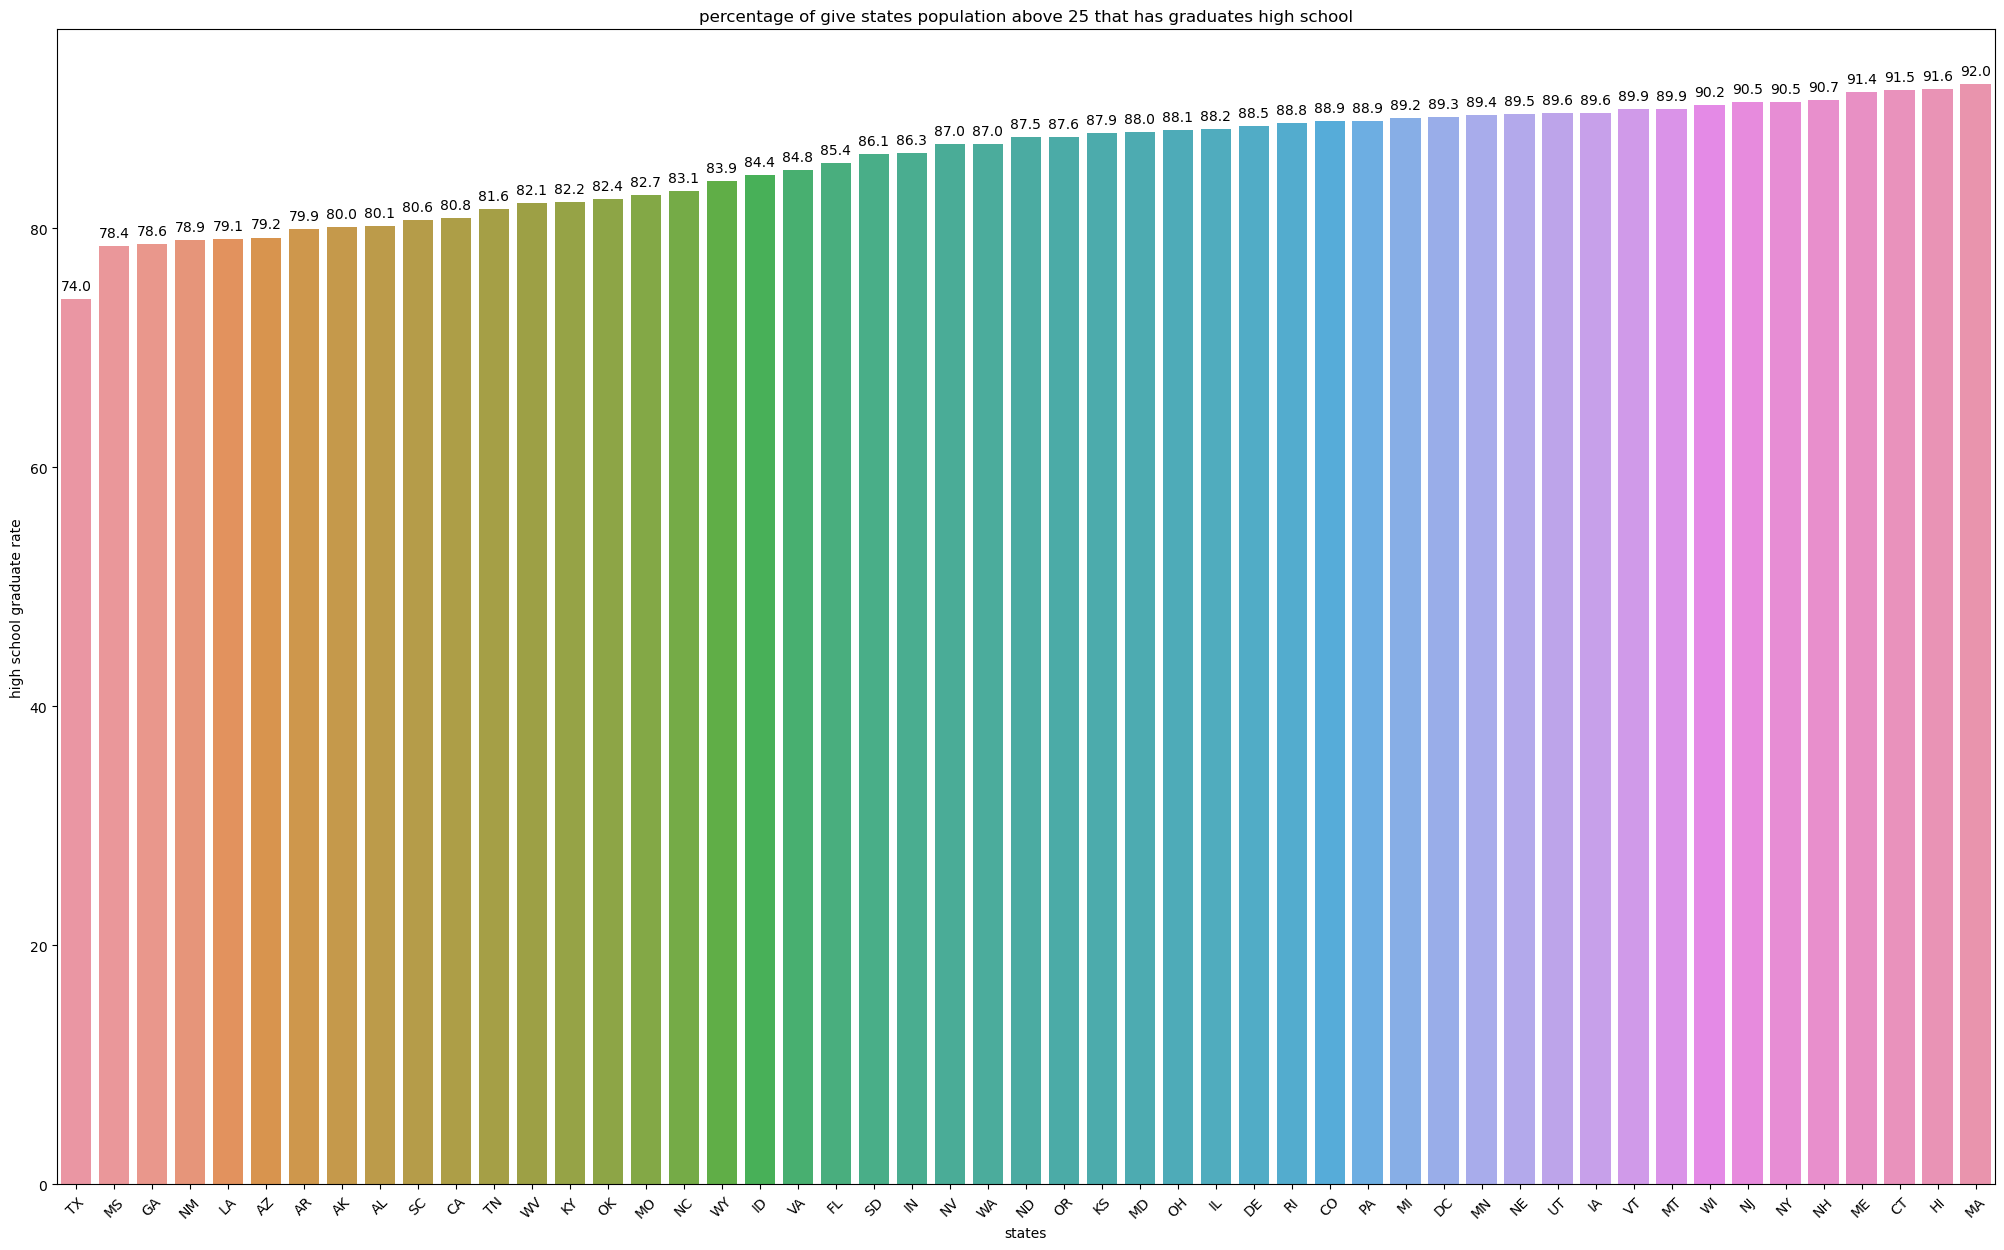

In [27]:
#visualization
plt.figure(figsize=(25,15))

x=sorted_df2["area_list"]
values=sorted_df2["area_highschool_ratio"]
ax=sns.barplot(x=x,y=values)

# her bir barın üzerine y değerimizi(area_highschool_ratio) ekledik.
for i, value in enumerate(values):
    ax.text(i, value + 0.5, str(value)[:4], ha='center', va='bottom') 
    #float değeri str(value) ile stringe çevirdik ve [:4] ile sayının ilk 3 basamağını aldık 
       
plt.xticks(rotation=45)
plt.xlabel("states")
plt.ylabel("high school graduate rate")
plt.title("percentage of give states population above 25 that has graduates high school")
plt.show()

## 5- Percentage of state's population according to races that are black,white,native american,asian and hispanic (eyaletlerdeki ırkların oranı)

In [28]:
share_race_by_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [29]:
share_race_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


* object değerlerini floata çevirmemiz gerek çünkü veriler oran

In [30]:
share_race_by_city.share_white.value_counts()

100     1051
97.7     298
96.9     294
98.2     289
97.3     287
        ... 
21.8       1
13.3       1
9.3        1
20.7       1
36.3       1
Name: share_white, Length: 997, dtype: int64

In [31]:
share_race_by_city.share_black.value_counts()

0       6587
0.2     1346
0.3     1333
0.4     1256
0.5     1078
        ... 
93.6       1
72.2       1
87.9       1
91.6       1
63         1
Name: share_black, Length: 926, dtype: int64

In [32]:
share_race_by_city.share_native_american.value_counts()

0       6930
0.2     3170
0.3     2612
0.1     2522
0.4     2004
        ... 
74.4       1
40.8       1
52.2       1
75.7       1
56.6       1
Name: share_native_american, Length: 628, dtype: int64

In [33]:
share_race_by_city.share_asian.value_counts()

0       8537
0.2     1879
0.3     1775
0.4     1644
0.1     1426
        ... 
30.6       1
28.6       1
50.3       1
46.2       1
24.7       1
Name: share_asian, Length: 409, dtype: int64

In [34]:
share_race_by_city.share_hispanic.value_counts()

0       2489
1        584
0.9      579
1.4      578
1.1      569
        ... 
92.5       1
83.3       1
71.1       1
77.9       1
37.2       1
Name: share_hispanic, Length: 956, dtype: int64

* veriyi inceledik ve hatalı bir veri göremedik tek yapılması gereken object türlerin floata çevrilmesi

In [35]:
share_race_by_city.replace(["(X)"],0.0,inplace=True) # bu satır hata aldıktan sonra eklenmiştir!!!

share_race_by_city.share_white=share_race_by_city.share_white.astype(float)
#share_race_by_city.share_white=share_race_by_city.share_white.astype(float) şeklinde çalıştırınca -
#could not convert string to float: '(X)' hatası aldım. demekki (X) diye hatalı bir veri var
#incelerken farkedemedik nt diyelim. şimdi bu hatayı fixleyince kod hata vermeyecek
#share_race_by_city.replace(["(X)"],0.0,inplace=True) yazınca (X) değerini 0'a çeviricez ve fixlencek

share_race_by_city.share_black=share_race_by_city.share_black.astype(float)
share_race_by_city.share_native_american=share_race_by_city.share_native_american.astype(float)
share_race_by_city.share_asian=share_race_by_city.share_asian.astype(float)
share_race_by_city.share_hispanic=share_race_by_city.share_hispanic.astype(float)

In [36]:
area_list=list(share_race_by_city["Geographic area"].unique()) #tekrarlamyan eyaletleri aldık

#her ırk için boş liste oluşturduk
share_white =[]
share_black =[]
share_native_american =[]
share_asian =[]
share_hispanic =[]

#boş listeleri oranlara göre doldurduk 
#(burda şehirlere göre sıralama yapsaydık bu işleme gerek yoktu ancak eyaletlere göre çalışıyoruz ve eyaletlerde birden çok şehir var)
for i in area_list:
    x=share_race_by_city[share_race_by_city["Geographic area"]==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, 'Percentage of States Population According to Races')]

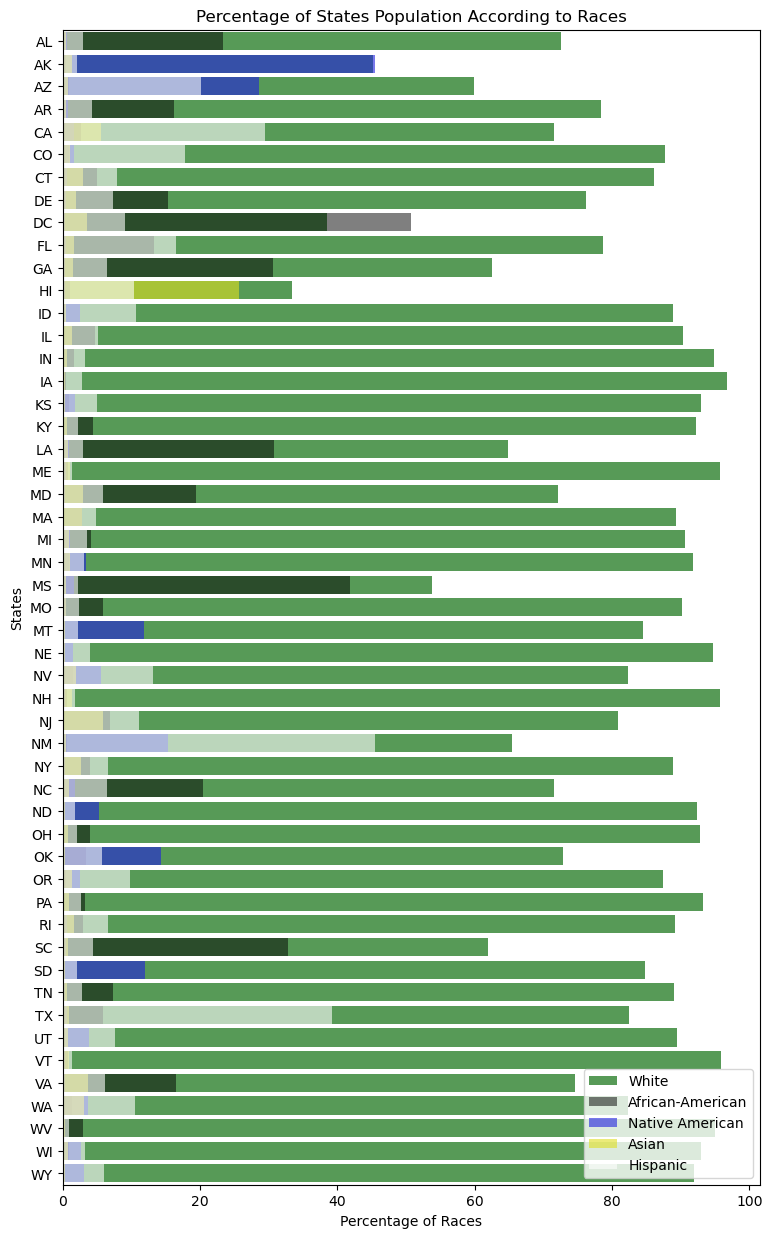

In [37]:
# visualization
f,ax=plt.subplots(figsize=(9,15))
sns.barplot(x=share_white,y=area_list,color="green",alpha=0.7,label="White") #alpha saydamlık
sns.barplot(x=share_black,y=area_list,color="black",alpha=0.5,label="African-American")
sns.barplot(x=share_native_american,y=area_list,color="blue",alpha=0.6,label="Native American")
sns.barplot(x=share_asian,y=area_list,color="yellow",alpha=0.6,label="Asian")
sns.barplot(x=share_hispanic,y=area_list,color="white",alpha=0.6,label="Hispanic")

ax.legend(loc="lower right",frameon=True) #labelların yerini belirttil ve görünürlüğü true yaptık

ax.set(xlabel="Percentage of Races",ylabel="States",title="Percentage of States Population According to Races")

## 6- High school graduation rate vs Poverty rate of each state(her bir eyaletteki liseden mezun olma oranını ve fakirlik oranını karşılaştır)

In [38]:
#önceki yazdığımız kodlarda percent_over_25_completed_highschool dfsini sıralamıştık(sorted_data)
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [39]:
#aynı zamanda percentage_people_below_povert_level dfsini de sıralamıştık (sorted_df2)
sorted_df2.head()

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


#### normalize mantığı?
[10,20,30,40,50] sayılarımız olsun.bütüm sayıları burdaki en büyük sayıya bölersek oranı değiştirmeyip bütün sayıları 0 ile 1 arasında tutmuş oluruz;
[10/50,20/50,30/50,40/50,50/50] -> [1/5,2/5,3/5,4/5,1]

In [40]:
#normalizition yapmamız gerek sağlıklı sonuç almak için verileri 0 ile 1 arasında tutmalıyız
#bu soruda sayılarla değil çizginin eğimi ile ilgileniyoruz o yüzden sayıların değil oranın önemi var
#
sorted_data["area_poverty_ratio"]=sorted_data["area_poverty_ratio"]/max(sorted_data["area_poverty_ratio"])
sorted_df2["area_highschool_ratio"]=sorted_df2["area_highschool_ratio"]/max(sorted_df2["area_highschool_ratio"])

In [41]:
#bu iki datayı concat fonksiyonu ile birleştirelim
dataf=pd.concat([sorted_data,sorted_df2["area_highschool_ratio"]],axis=1)
#sorted_data'ya sorted_df2 içindeki area_highschool_ratio sütununu ekledik gibi düşünebiliriz
dataf.sort_values("area_poverty_ratio",inplace=True)
dataf.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


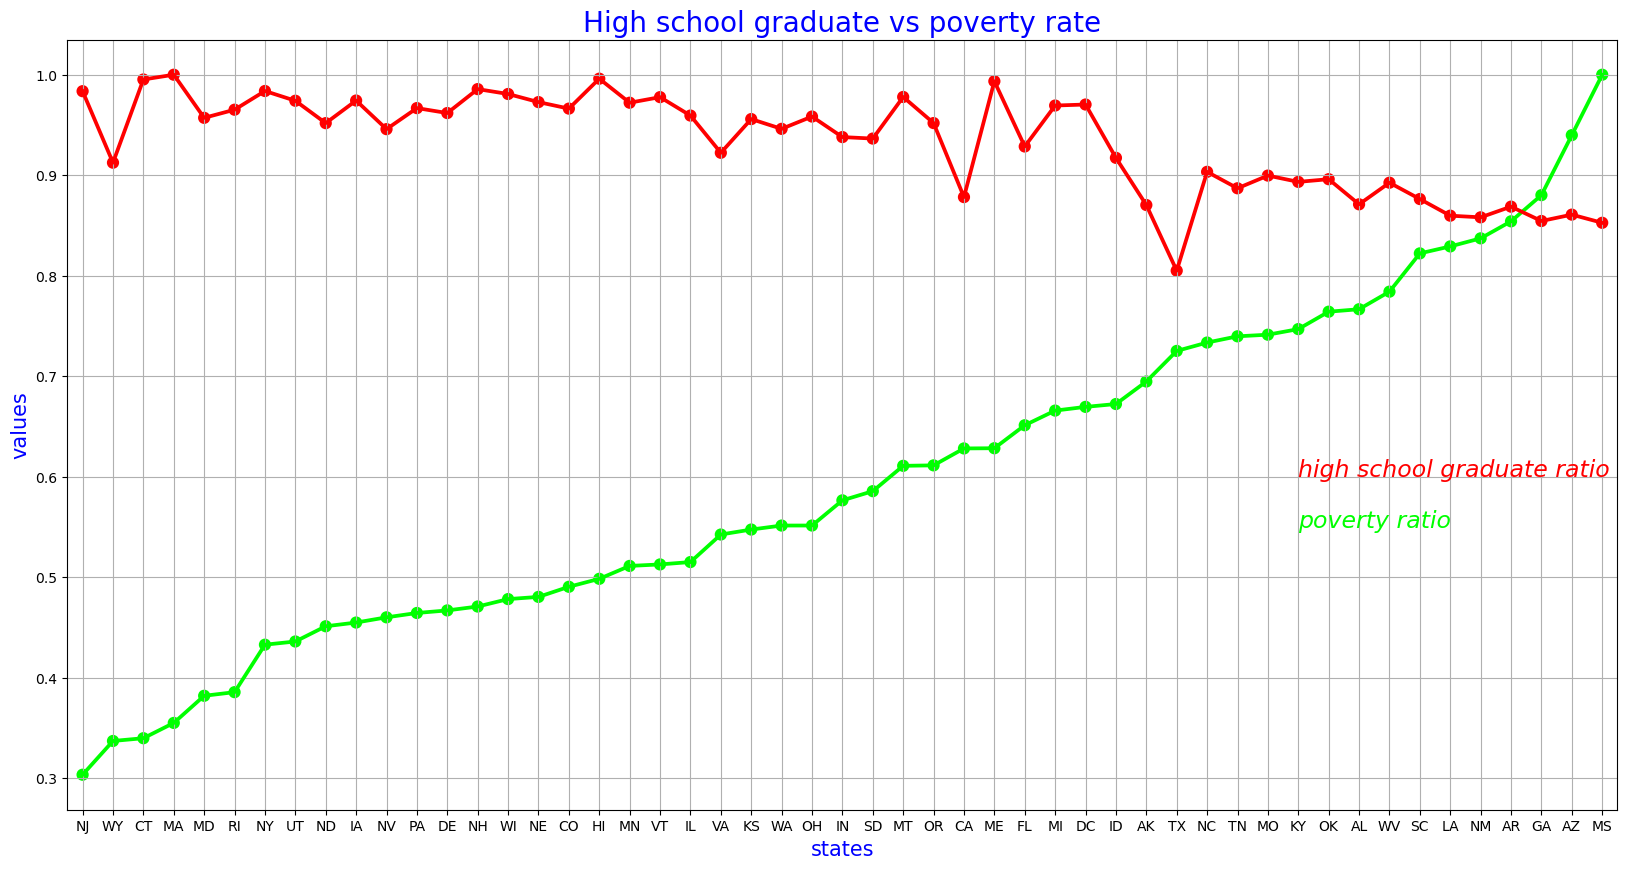

In [42]:
#visualization
f,axl=plt.subplots(figsize=(20,10))
sns.pointplot(x="area_list",y="area_poverty_ratio",data=dataf,color="lime") 
#data=dataf yani hangi datayı kullandığımızı belirttik
sns.pointplot(x="area_list",y="area_highschool_ratio",data=dataf,color="red")
plt.text(40,0.6,"high school graduate ratio",color="red",fontsize=17,style="italic")
plt.text(40,0.55,"poverty ratio",color="lime",fontsize=17,style="italic")
plt.xlabel("states",fontsize=15,color="blue")
plt.ylabel("values",fontsize=15,color="blue")
plt.title("High school graduate vs poverty rate",fontsize=20,color="blue")
plt.grid() #arkaplandaki çizgileri çizdiriyor

* Görselleştirme sonrası diyebiliriz ki ikisi %100 olmasada ters orantıya sahip 

## 7- High school graduation rate vs Poverty rate of each state with JOINTPLOT

In [43]:
dataf.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


C:\Users\90541\anaconda3\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'size'
  cset = contour_func(


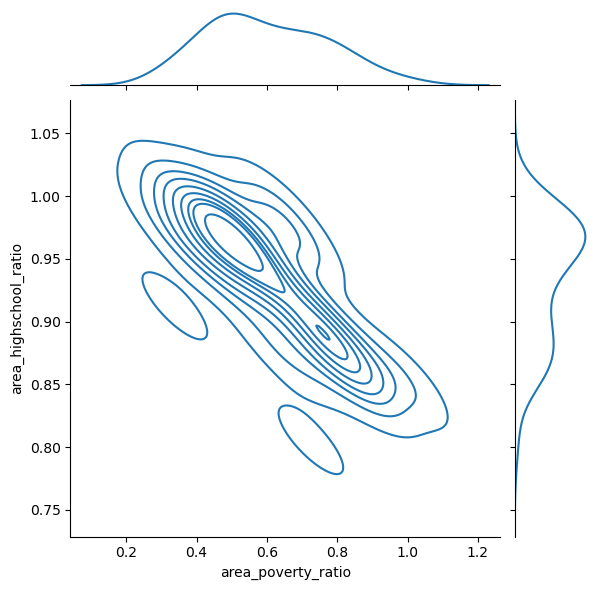

In [44]:
g=sns.jointplot(x=dataf["area_poverty_ratio"],y=dataf["area_highschool_ratio"],kind="kde",size=7)
#kind kısmında grafiğin ne tür olmasını istediğimizi gireriz. bu istenilen türler googledan falan bulunur
plt.savefig("graph.png")
plt.show()

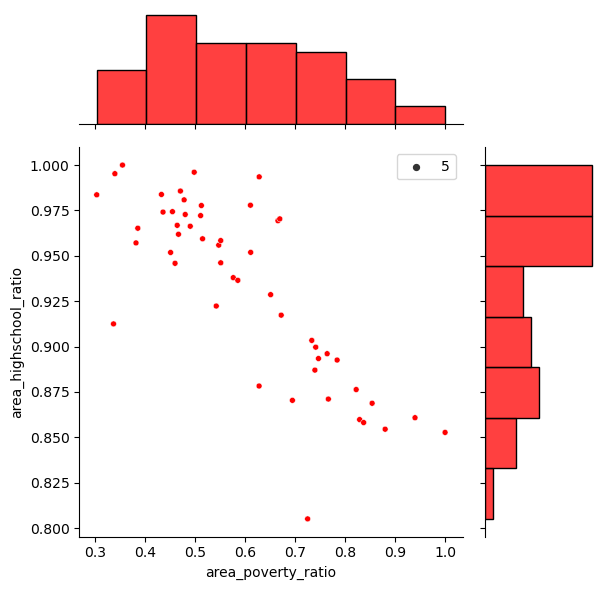

In [45]:
# joinplotu değiştirebiliriz
g=sns.jointplot(x=dataf["area_poverty_ratio"],y=dataf["area_highschool_ratio"],ratio=3,size=5,color="r")

## 8- Race rates according to states in kill data(öldürme verilerine göre eyaletlere göre ırk oranları)(pie chart)

In [46]:
police_killings_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [47]:
#race kısmıyla ilgilendiğimiz için sadece race'e bakıyoruz
police_killings_us.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [48]:
police_killings_us.race.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2535 entries, 0 to 2534
Series name: race
Non-Null Count  Dtype 
--------------  ----- 
2340 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [49]:
police_killings_us.race.value_counts()
#o -> other (listede olmayan diğer ırklar)

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [50]:
police_killings_us.race.dropna(inplace=True)
# datamın ırk'ında boş varsa yani NaN veri varsa bunu sil ve güncelle

labels=police_killings_us.race.value_counts().index
#datamın ırkları sayı indexlerini al ve labela eşitle
#indexler -> w,b,h,a,n,o

colors=["grey","green","blue","red","yellow","brown"]
#pie chartımın renkleri olucak

explode=[0,0,0,0,0,0]
#pie chartlarımın oranı olucak bu liste sonradan dolucak

sizes=police_killings_us.race.value_counts().values
#valueları alıyoruz. values-> 1201,618,423,39,31,28

Text(0.5, 1.0, 'Killed people according to races')

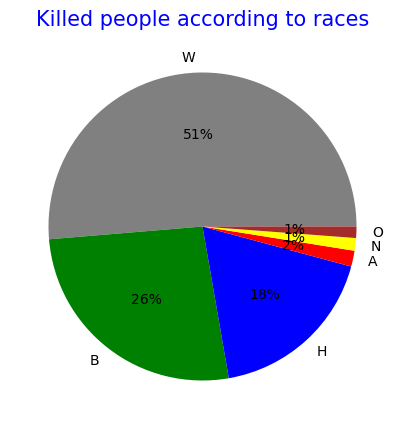

In [51]:
#visualization
plt.figure(figsize=(5,5))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.lf%%") #autopct sayının kaç ondalık olcağını belirtir
plt.title("Killed people according to races",color="blue",fontsize=15)

## 9-High school graduation rate vs Poverty rate of each state with LM PLOT

C:\Users\90541\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


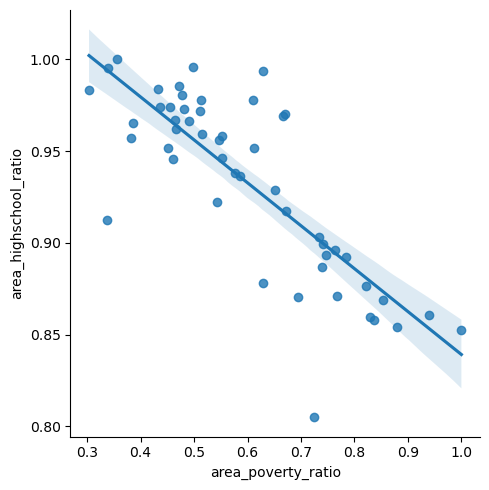

In [52]:
# show the results of a linear regression within each dataset 
# lineer regresyonda kullanılır bolcanaaa
sns.lmplot(x="area_poverty_ratio",y="area_highschool_ratio",data=dataf)
plt.show()

## 10-High school graduation rate vs Poverty rate of each state with KDE PLOT

In [53]:
dataf.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


C:\Users\90541\AppData\Local\Temp\ipykernel_17256\3767928323.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dataf.area_poverty_ratio,y=dataf.area_highschool_ratio,shade=True,cut=5)


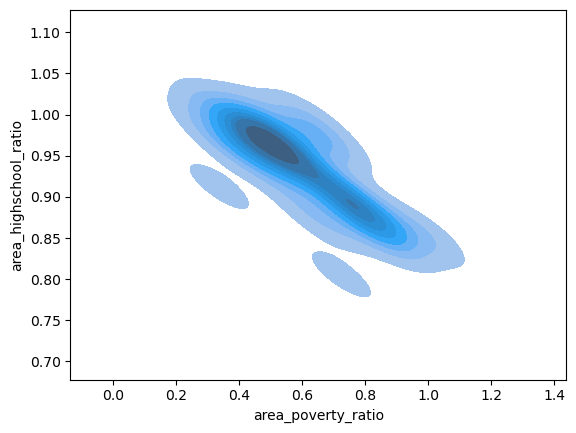

In [54]:
sns.kdeplot(x=dataf.area_poverty_ratio,y=dataf.area_highschool_ratio,shade=True,cut=5)
# shade: Alanın altını renklendirmek için kullanılır.
# cut: Çekirdek fonksiyonunun sonlandığı yerin belirlenmesi.
plt.show()

## 11-High school graduation rate vs Poverty rate of each state with VIOLIN PLOT

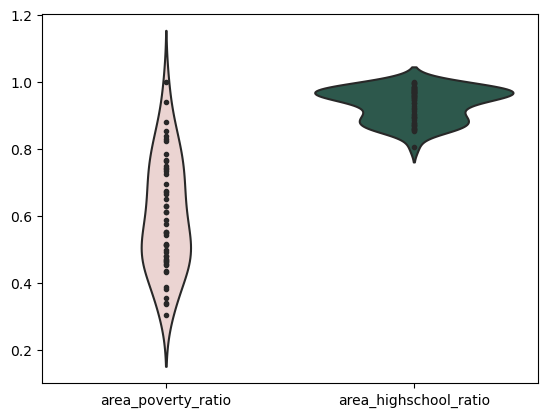

In [55]:
pal=sns.cubehelix_palette(2,rot=-.8,dark=.3) # sadece renkler başka bişe değil
sns.violinplot(data=dataf,palette=pal,inner="points")
plt.show()

## 12-High school graduation rate vs Poverty rate of each state with HEATMAP

In [56]:
dataf.corr()
#korelasyon sadece sayılar arasında çıkar
#Pozitif korelasyon; iki değişken arasında uyumlu bir ilişki olması, değişkenin birinin değeri artarken
# ya da azalırken diğer değişkenin değeri de diğeri ile aynı şekilde artıp azalır.

C:\Users\90541\AppData\Local\Temp\ipykernel_17256\3498490544.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataf.corr()


,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


C:\Users\90541\AppData\Local\Temp\ipykernel_17256\1328274928.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataf.corr(),annot=True,linewidths=-.5,fmt=".1f",ax=ax)


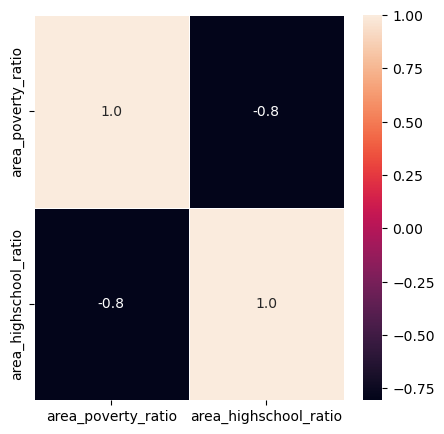

In [57]:
#korelasyonu göstermek için kullanlır genelde
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(dataf.corr(),annot=True,linewidths=-.5,fmt=".1f",ax=ax)
plt.show()

## 13- Manner of death (ölüm şekli) ne göne sıralama BOX PLOT

In [58]:
police_killings_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


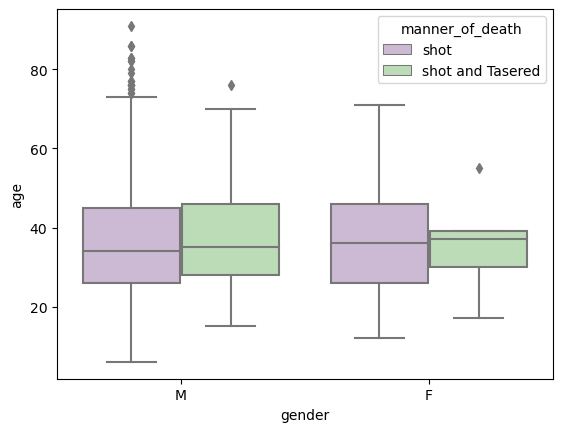

In [59]:
# manner of death : shoot(ateş edilerek), soot and tasered(şok tabancasıyla)
# gender: cinsiyet
# age: yaş
# bu verilere göre görselleştiricez
sns.boxplot(x="gender",y="age",hue="manner_of_death",data=police_killings_us,palette="PRGn")
#hue : verdiğimiz satırı unik olarak classlarına ayırıyor
plt.show()

* grafiği yorumlarsak erkeklerde şok tabancasıyla öldürülme bir tık daha fazla ve yaş ortalaması da bir tık daha fazla. kutuların dışında kalan eşkenar dörtgenler outlier verilrdir yani istisnalardır.

* kadınlarda vurularak öldürülme şok tabancayla öldürülmeye göre çok daha fazla. şok tabancasıyla öldürülenler daha yaşlı oluyor imiş

## 14- Manner of death (ölüm şekli) ne göne sıralama SWARM PLOT

In [60]:
# swarm plot
# manner of death : shoot(ateş edilerek), soot and tasered(şok tabancasıyla)
# gender: cinsiyet
# age: yaş
# bu verilere göre görselleştiricez
police_killings_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


C:\Users\90541\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\90541\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


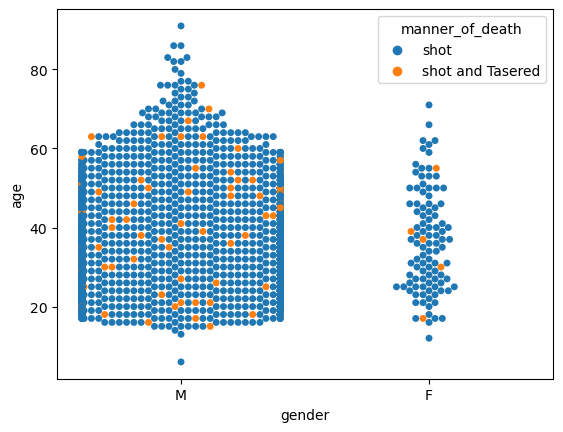

In [61]:
sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=police_killings_us)
plt.show()
# veriseti çok fazlaysa(ex.10000) swarmplot kullanmak biraz zordur %100 çizdirememe ihtimali fazladır 

## 15-High school graduation rate vs Poverty rate of each state with PAIR PLOT

C:\Users\90541\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


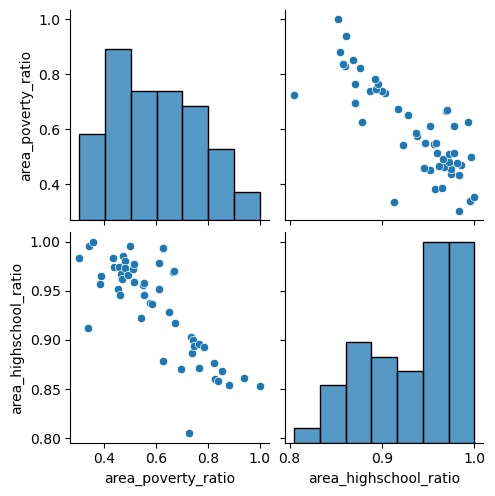

In [72]:
sns.pairplot(data=dataf)
#bu data içindeki nümerik(sayısal) değerleri plot ettiriyor
plt.show()

## 16- Manner of death (ölüm şekli) ne göne sıralama COUNT PLOT

In [73]:
police_killings_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [75]:
police_killings_us.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

In [76]:
police_killings_us.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

Text(0.5, 1.0, 'gender')

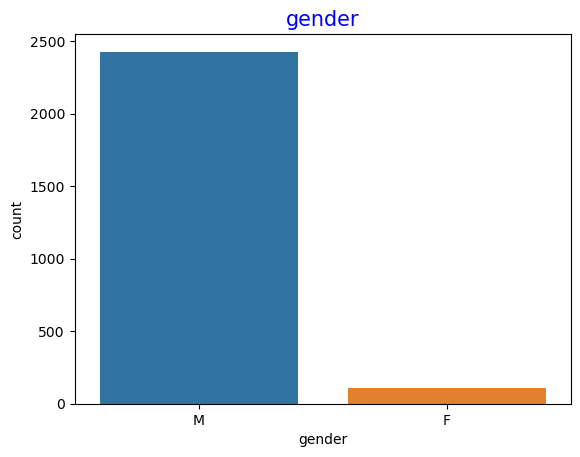

In [82]:
# kill properties
# manner of death
sns.countplot(x="gender",data=police_killings_us)
plt.title("gender",color="blue",fontsize=15)

In [84]:
#kill weapon
armed=police_killings_us.armed.value_counts()
armed

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

Text(0.5, 1.0, 'kill weapon')

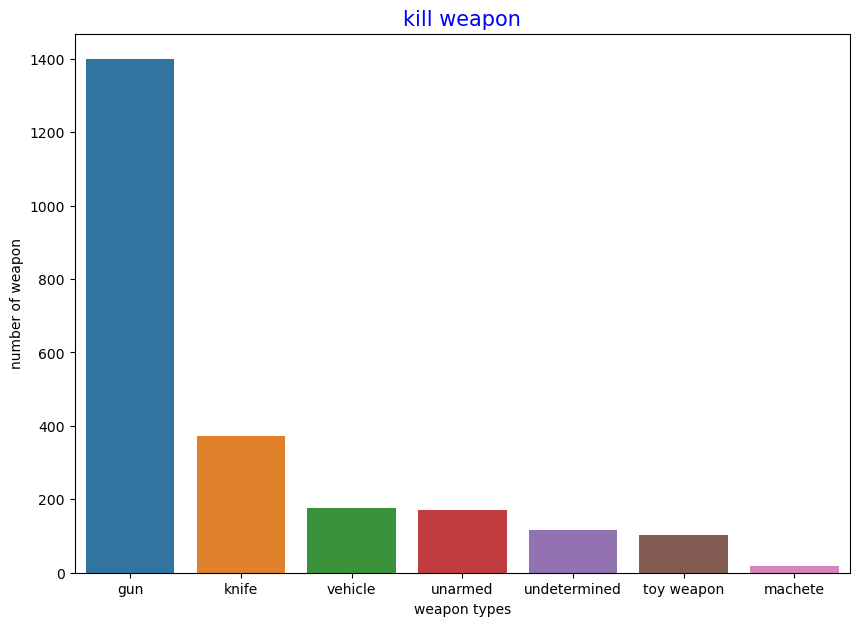

In [85]:
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values) # en fazla 7 taneyi kullandık ([:7])
plt.xlabel("weapon types")
plt.ylabel("number of weapon")
plt.title("kill weapon",color="blue",fontsize=15)

In [87]:
#age of killed people
above25=["above25" if i>=25 else "below25" for i in police_killings_us.age]
#yaş 25ten büyükse above de değilse below de ve bunu above25 adlı bir listede tut
df=pd.DataFrame({"age":above25})

In [91]:
df.head(10)

,age
0,above25
1,above25
2,below25
3,above25
4,above25
5,below25
6,below25
7,above25
8,above25
9,above25


In [92]:
df.age.value_counts()

above25    2008
below25     527
Name: age, dtype: int64

Text(0, 0.5, 'number of killed people')

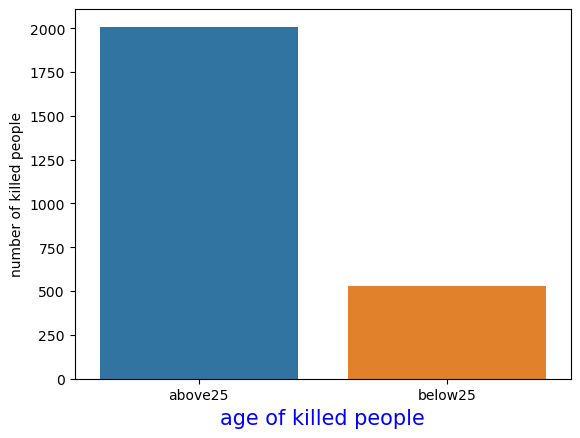

In [93]:
sns.countplot(x=df.age)
plt.xlabel("age of killed people",color="blue",fontsize=15)
plt.ylabel("number of killed people")

Text(0.5, 1.0, 'race of killed people')

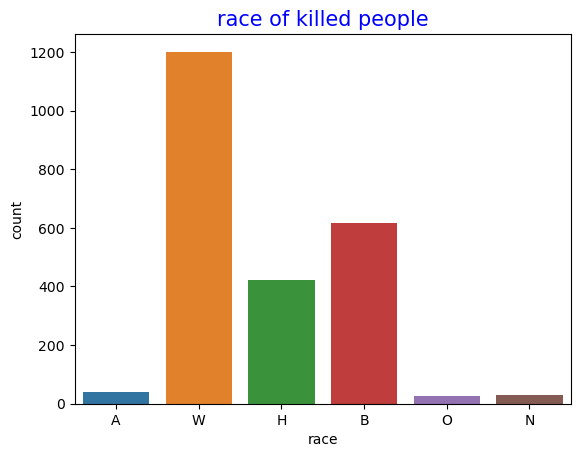

In [94]:
#race of killed people
sns.countplot(x="race",data=police_killings_us)
plt.title("race of killed people",color="blue",fontsize=15)

In [96]:
#most dangerous cities
city=police_killings_us.city.value_counts()
city

Los Angeles         39
Phoenix             31
Houston             27
Chicago             25
Las Vegas           21
                    ..
Columbia Heights     1
Ozark                1
Lampe                1
Seagoville           1
Oshkosh              1
Name: city, Length: 1417, dtype: int64

Text(0.5, 1.0, 'most dangerous cities')

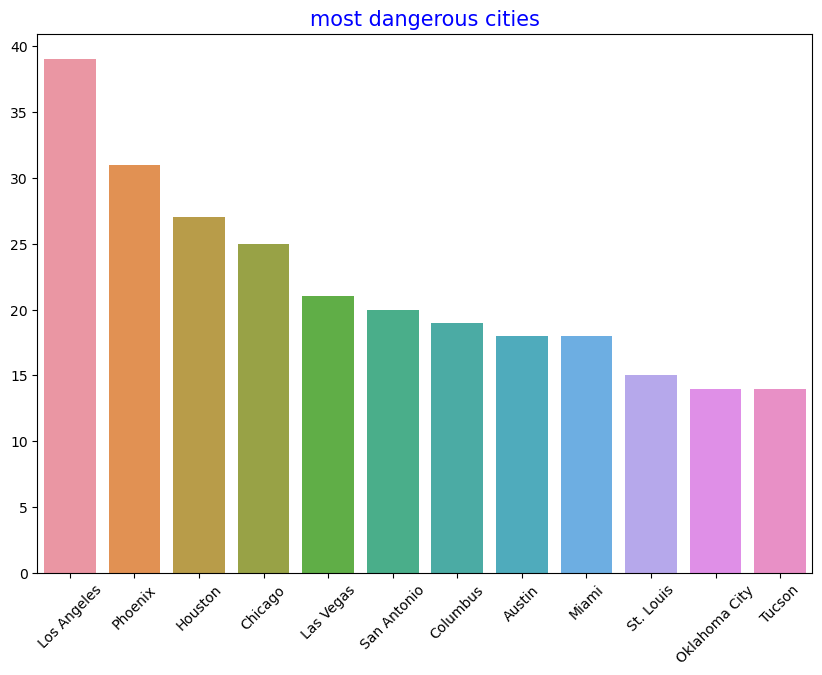

In [97]:
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title("most dangerous cities",color="blue",fontsize=15)